In [ ]:
import pandas as pd
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib import rcParams
pd.set_option('display.max_rows', None)

In [ ]:
data = pd.read_csv("/content/AutoML cleaned.csv")
data = data.drop(['ID','Site'],axis=1)
columns = data.columns
data

,HasEmail,HasPhone,HasAddr,HasGeneric,HasSameD,HasExt,HasInt,HasEdEmail,HasEdName,MissOwner,Moz,Google
0,0,0,0,0,0,0,0,0,0,0,59,1
1,1,0,0,0,1,0,0,0,0,0,38,1
2,1,0,0,1,0,0,0,0,0,0,16,1
3,0,0,0,0,0,0,0,0,0,0,20,1
4,0,0,0,0,0,0,0,0,0,0,9,1
5,1,0,0,0,1,0,0,0,0,0,67,1
6,0,0,0,0,0,0,0,0,0,0,9,1
7,1,1,0,0,1,0,0,0,0,0,48,1
8,1,1,1,1,1,1,1,1,1,0,15,1
9,0,1,0,0,0,0,0,0,0,0,26,1


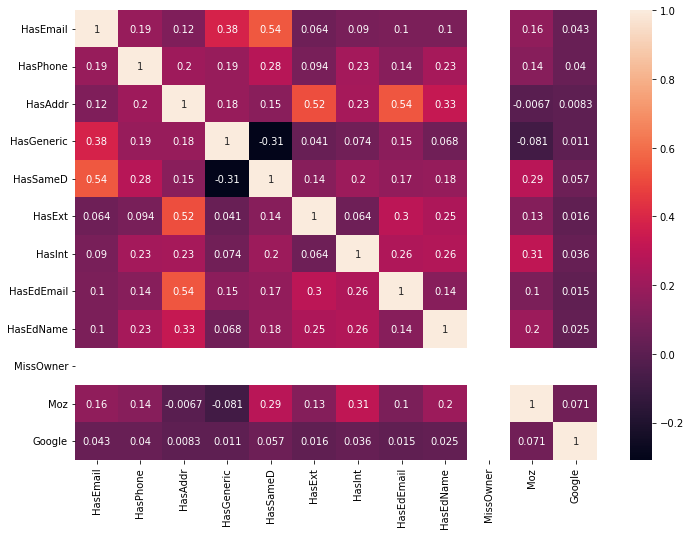

In [ ]:
rcParams['figure.figsize'] = 11.7,8.27
corr_matrix = data.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
components = 11
pca = PCA(components)
pca.fit(data)
var_exp = pca.explained_variance_ratio_
sv = pca.singular_values_
tot_var_exp = []

for i in range(1,components):
    tot_var_exp.append(sum(var_exp[:i]))
# WTF
tot_var_exp

[0.9977064050611804,
 0.9985134016680322,
 0.9990342794949332,
 0.9993961884446229,
 0.9996298894003072,
 0.9997800417570442,
 0.9998726761226481,
 0.9999298938646308,
 0.99997469319449,
 0.999990376764482]

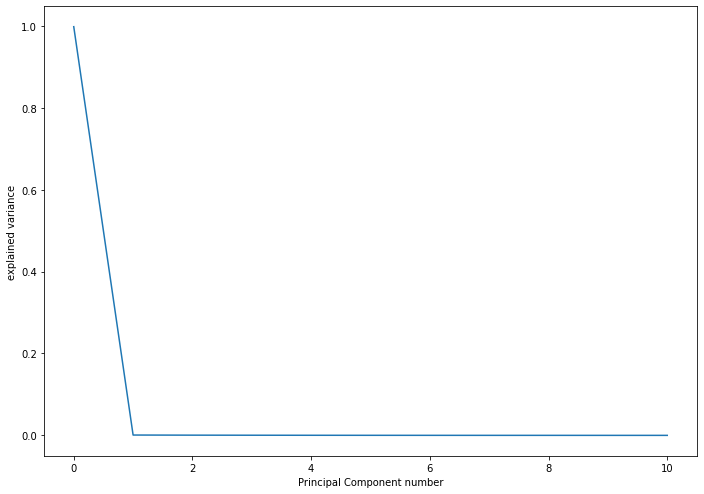

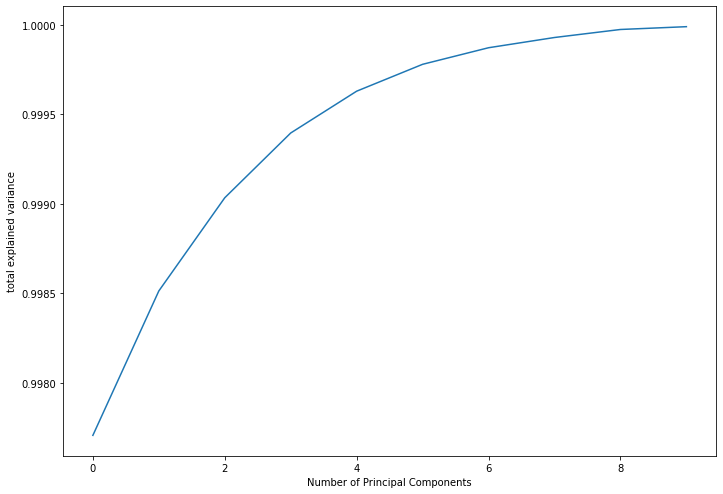

In [ ]:
plt.figure(1)
plt.plot(var_exp)
plt.xlabel('Principal Component number')
plt.ylabel('explained variance')

plt.figure(2)
plt.plot(tot_var_exp)
plt.xlabel('Number of Principal Components')
plt.ylabel('total explained variance')

plt.show()

In [ ]:
comps = pca.components_[0]
coords = []
for i in range(0,len(columns)):
    coords.append((columns[i],pca.components_[0][i]))
coords

[('HasEmail', 0.003838694827294054),
 ('HasPhone', 0.002519941744080434),
 ('HasAddr', -3.0229743081579014e-05),
 ('HasGeneric', -0.0015947607090711635),
 ('HasSameD', 0.006357017659683398),
 ('HasExt', 0.0011005801173746923),
 ('HasInt', 0.005272857684352312),
 ('HasEdEmail', 0.0008404451436952185),
 ('HasEdName', 0.0026383741263482268),
 ('MissOwner', 0.0),
 ('Moz', 0.9999495970991824),
 ('Google', 0.00028294329033171626)]